In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
df_renamed = data.rename(columns={
    'Gender': 'Gender',
    'Age': 'Age',
    'MaritalStatus': 'Relationship status',  
    'Education': 'Highest Educational Qualification',
    'EducationField': 'Field of Education',
    'TotalWorkingYears': 'Years of working experience',
    'YearsAtCompany': 'Years within current field of employment',
    'EmployeeNumber': 'Employee code/number',
    'JobRole': 'Job type', 
    'Department': 'Employee department', 
    'WorkLifeBalance': 'Work-Life balance',
    'JobSatisfaction': 'Job satisfaction',  
    'YearsInCurrentRole': 'Years in current role',
    'YearsWithCurrManager': 'Years with current supervisor',
    'YearsSinceLastPromotion': 'Years since last promotion',
    'MonthlyIncome': 'Salary'
})

columns_in_image = [
    'Gender', 'Age', 'Relationship status', 'Highest Educational Qualification', 'Field of Education', 
    'Years of working experience', 'Years within current field of employment', 'Employee code/number',
    'Job type', 'Job Location', 'Seniority Level', 'Salary', 'avg Hours worked per week', 
    'Value of benefits/allowance provided', 'Performance Rating', 'Training/upskilling opportunities provided',
    'average Travel on work percentage', 'Unpaid Overtime hours per week', 'Employee department',
    'Years in current role', 'Years with current supervisor', 'Years since last promotion', 
    'number of employee in company', 'last salary adjustment percentage', 'Work-Life balance',
    'employer Recognition/award', 'Job satisfaction', 'Company satisfaction', 'Label'
]


df_cleaned = df_renamed[df_renamed.columns.intersection(columns_in_image)]

df_cleaned

,Age,Employee department,Highest Educational Qualification,Field of Education,Employee code/number,Gender,Job type,Job satisfaction,Relationship status,Salary,Years of working experience,Work-Life balance,Years within current field of employment,Years in current role,Years since last promotion,Years with current supervisor,Label
0,37,Research & Development,4,Life Sciences,77,Male,Manufacturing Director,3,Divorced,5993,7,4,7,5,0,7,0
1,54,Research & Development,4,Life Sciences,1245,Female,Manufacturing Director,3,Divorced,10502,33,1,5,4,1,4,0
2,34,Research & Development,3,Life Sciences,147,Male,Laboratory Technician,3,Single,6074,9,3,9,7,0,6,1
3,39,Research & Development,1,Life Sciences,1026,Female,Manufacturing Director,4,Married,12742,21,3,21,6,11,8,0
4,28,Research & Development,3,Medical,1111,Male,Laboratory Technician,2,Divorced,2596,1,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,35,Research & Development,4,Medical,75,Female,Laboratory Technician,1,Married,4014,4,3,2,2,2,2,0
1096,38,Sales,4,Marketing,1835,Female,Sales Representative,4,Married,5405,20,2,4,2,0,3,0
1097,37,Sales,4,Marketing,868,Male,Sales Executive,3,Divorced,6334,9,3,1,0,0,0,0
1098,22,Research & Development,1,Life Sciences,1878,Male,Research Scientist,2,Single,2472,1,3,1,0,0,0,1


In [4]:
import numpy as np


num_rows = df_cleaned.shape[0]


np.random.seed(42)


job_location = np.random.choice(['On-Site', 'Remote', 'Hybrid'], size=num_rows)


seniority_level = np.random.choice(['Graduate/intern', 'Junior', 'Mid', 'Senior', 'Executive'], size=num_rows)

avg_hours_per_week = np.random.randint(30, 61, size=num_rows)

performance_rating = np.random.randint(1, 6, size=num_rows)


training_opportunities = np.random.choice(
    ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'], size=num_rows)


travel_percentage = np.random.randint(0, 51, size=num_rows)


num_employees = np.random.randint(100, 10001, size=num_rows)


salary_adjustment_percentage = np.random.uniform(0, 10, size=num_rows).round(2)


employer_recognition = np.random.choice(
    ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'], size=num_rows)

satisfaction_choices = ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree']

satisfaction_prob_label_1 = [0.4, 0.3, 0.2, 0.05, 0.05]  


satisfaction_prob_label_0 = [0.05, 0.05, 0.2, 0.3, 0.4]


company_satisfaction = np.where(
    df_cleaned['Label'] == 1, 
    np.random.choice(satisfaction_choices, size=num_rows, p=satisfaction_prob_label_1),
    np.random.choice(satisfaction_choices, size=num_rows, p=satisfaction_prob_label_0)
)

unpaid_overtime = np.where(df_cleaned['Label'] == 1, 
                           np.random.normal(15, 4, size=num_rows).astype(int),
                           np.random.normal(5, 4, size=num_rows).astype(int))


unpaid_overtime = np.clip(unpaid_overtime, 0, None)


benefits_value = np.where(df_cleaned['Label'] == 0, 
                          np.random.normal(7500, 2000, size=num_rows).astype(int), 
                          np.random.normal(2500, 2000, size=num_rows).astype(int))  


benefits_value = np.clip(benefits_value, 0, None)


df_cleaned['Job Location'] = job_location
df_cleaned['Seniority Level'] = seniority_level
df_cleaned['avg Hours worked per week'] = avg_hours_per_week
df_cleaned['Value of benefits/allowance provided'] = benefits_value
df_cleaned['Performance Rating'] = performance_rating
df_cleaned['Training/upskilling opportunities provided'] = training_opportunities
df_cleaned['average Travel on work percentage'] = travel_percentage
df_cleaned['Unpaid Overtime hours per week'] = unpaid_overtime
df_cleaned['number of employee in company'] = num_employees
df_cleaned['last salary adjustment percentage'] = salary_adjustment_percentage
df_cleaned['employer Recognition/award'] = employer_recognition
df_cleaned['Company satisfaction'] = company_satisfaction

C:\Users\User\AppData\Local\Temp\ipykernel_20548\1381809625.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Job Location'] = job_location
C:\Users\User\AppData\Local\Temp\ipykernel_20548\1381809625.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Seniority Level'] = seniority_level
C:\Users\User\AppData\Local\Temp\ipykernel_20548\1381809625.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [5]:
df_cleaned

,Age,Employee department,Highest Educational Qualification,Field of Education,Employee code/number,Gender,Job type,Job satisfaction,Relationship status,Salary,...,avg Hours worked per week,Value of benefits/allowance provided,Performance Rating,Training/upskilling opportunities provided,average Travel on work percentage,Unpaid Overtime hours per week,number of employee in company,last salary adjustment percentage,employer Recognition/award,Company satisfaction
0,37,Research & Development,4,Life Sciences,77,Male,Manufacturing Director,3,Divorced,5993,...,36,8334,1,strongly disagree,47,6,4761,6.44,neutral,neutral
1,54,Research & Development,4,Life Sciences,1245,Female,Manufacturing Director,3,Divorced,10502,...,33,9186,3,disagree,33,4,9499,8.34,strongly agree,agree
2,34,Research & Development,3,Life Sciences,147,Male,Laboratory Technician,3,Single,6074,...,42,1279,4,strongly agree,9,14,1994,5.77,neutral,strongly disagree
3,39,Research & Development,1,Life Sciences,1026,Female,Manufacturing Director,4,Married,12742,...,46,9579,2,disagree,34,7,7489,6.46,disagree,strongly disagree
4,28,Research & Development,3,Medical,1111,Male,Laboratory Technician,2,Divorced,2596,...,57,5948,1,strongly disagree,10,8,5022,4.58,strongly disagree,strongly disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,35,Research & Development,4,Medical,75,Female,Laboratory Technician,1,Married,4014,...,36,7150,4,disagree,37,0,2789,1.02,strongly disagree,neutral
1096,38,Sales,4,Marketing,1835,Female,Sales Representative,4,Married,5405,...,35,8021,5,strongly disagree,13,3,4195,7.28,strongly agree,agree
1097,37,Sales,4,Marketing,868,Male,Sales Executive,3,Divorced,6334,...,38,6686,2,strongly disagree,50,11,1975,2.00,neutral,agree
1098,22,Research & Development,1,Life Sciences,1878,Male,Research Scientist,2,Single,2472,...,49,5269,2,neutral,25,16,7868,3.71,neutral,strongly disagree


In [6]:
new_column_order = [
    'Gender', 'Age', 'Relationship status', 'Highest Educational Qualification', 
    'Field of Education', 'Years of working experience', 'Years within current field of employment',
    'Employee code/number', 'Job type', 'Job Location', 'Seniority Level', 
    'Salary', 'avg Hours worked per week', 'Value of benefits/allowance provided', 
    'Performance Rating', 'Training/upskilling opportunities provided', 
    'Unpaid Overtime hours per week', 
    'Employee department', 'Years in current role', 'Years with current supervisor', 
    'Years since last promotion', 'number of employee in company', 'last salary adjustment percentage',
    'average Travel on work percentage', 'Work-Life balance', 'employer Recognition/award', 
    'Job satisfaction', 'Company satisfaction', 'Label'
]


df_reordered = df_cleaned[new_column_order]

In [7]:
df_reordered

,Gender,Age,Relationship status,Highest Educational Qualification,Field of Education,Years of working experience,Years within current field of employment,Employee code/number,Job type,Job Location,...,Years with current supervisor,Years since last promotion,number of employee in company,last salary adjustment percentage,average Travel on work percentage,Work-Life balance,employer Recognition/award,Job satisfaction,Company satisfaction,Label
0,Male,37,Divorced,4,Life Sciences,7,7,77,Manufacturing Director,Hybrid,...,7,0,4761,6.44,47,4,neutral,3,neutral,0
1,Female,54,Divorced,4,Life Sciences,33,5,1245,Manufacturing Director,On-Site,...,4,1,9499,8.34,33,1,strongly agree,3,agree,0
2,Male,34,Single,3,Life Sciences,9,9,147,Laboratory Technician,Hybrid,...,6,0,1994,5.77,9,3,neutral,3,strongly disagree,1
3,Female,39,Married,1,Life Sciences,21,21,1026,Manufacturing Director,Hybrid,...,8,11,7489,6.46,34,3,disagree,4,strongly disagree,0
4,Male,28,Divorced,3,Medical,1,1,1111,Laboratory Technician,On-Site,...,0,0,5022,4.58,10,3,strongly disagree,2,strongly disagree,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Female,35,Married,4,Medical,4,2,75,Laboratory Technician,On-Site,...,2,2,2789,1.02,37,3,strongly disagree,1,neutral,0
1096,Female,38,Married,4,Marketing,20,4,1835,Sales Representative,Remote,...,3,0,4195,7.28,13,2,strongly agree,4,agree,0
1097,Male,37,Divorced,4,Marketing,9,1,868,Sales Executive,On-Site,...,0,0,1975,2.00,50,3,neutral,3,agree,0
1098,Male,22,Single,1,Life Sciences,1,1,1878,Research Scientist,Remote,...,0,0,7868,3.71,25,3,neutral,2,strongly disagree,1


In [8]:
import random
education_mapping = {1: 'School', 2: 'Undergraduate', 3: 'Post-graduate', 4: 'Doctorate'}
df_reordered['Highest Educational Qualification'] = df_reordered['Highest Educational Qualification'].replace(education_mapping)


job_types = ['Permanent', 'Fixed-term', 'Contract', 'Casual/adhoc']
df_reordered['Job type'] = [random.choice(job_types) for _ in range(len(df_reordered))]


departments = ['Operations', 'Management', 'HR', 'Finance', 'Technical']
df_reordered['Employee department'] = [random.choice(departments) for _ in range(len(df_reordered))]

work_life_mapping = {1: 'strongly disagree', 2: 'disagree', 3: 'neutral'}
work_life_random_values = ['agree', 'strongly agree']

df_reordered['Work-Life balance'] = df_reordered['Work-Life balance'].replace(work_life_mapping)
df_reordered['Work-Life balance'] = df_reordered['Work-Life balance'].apply(lambda x: random.choice(work_life_random_values) if x == 4 else x)

df_reordered['Job satisfaction'] = df_reordered['Job satisfaction'].replace(work_life_mapping)
df_reordered['Job satisfaction'] = df_reordered['Job satisfaction'].apply(lambda x: random.choice(work_life_random_values) if x == 4 else x)

In [9]:
df_reordered

,Gender,Age,Relationship status,Highest Educational Qualification,Field of Education,Years of working experience,Years within current field of employment,Employee code/number,Job type,Job Location,...,Years with current supervisor,Years since last promotion,number of employee in company,last salary adjustment percentage,average Travel on work percentage,Work-Life balance,employer Recognition/award,Job satisfaction,Company satisfaction,Label
0,Male,37,Divorced,Doctorate,Life Sciences,7,7,77,Fixed-term,Hybrid,...,7,0,4761,6.44,47,strongly agree,neutral,neutral,neutral,0
1,Female,54,Divorced,Doctorate,Life Sciences,33,5,1245,Permanent,On-Site,...,4,1,9499,8.34,33,strongly disagree,strongly agree,neutral,agree,0
2,Male,34,Single,Post-graduate,Life Sciences,9,9,147,Contract,Hybrid,...,6,0,1994,5.77,9,neutral,neutral,neutral,strongly disagree,1
3,Female,39,Married,School,Life Sciences,21,21,1026,Permanent,Hybrid,...,8,11,7489,6.46,34,neutral,disagree,strongly agree,strongly disagree,0
4,Male,28,Divorced,Post-graduate,Medical,1,1,1111,Permanent,On-Site,...,0,0,5022,4.58,10,neutral,strongly disagree,disagree,strongly disagree,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Female,35,Married,Doctorate,Medical,4,2,75,Casual/adhoc,On-Site,...,2,2,2789,1.02,37,neutral,strongly disagree,strongly disagree,neutral,0
1096,Female,38,Married,Doctorate,Marketing,20,4,1835,Casual/adhoc,Remote,...,3,0,4195,7.28,13,disagree,strongly agree,agree,agree,0
1097,Male,37,Divorced,Doctorate,Marketing,9,1,868,Fixed-term,On-Site,...,0,0,1975,2.00,50,neutral,neutral,neutral,agree,0
1098,Male,22,Single,School,Life Sciences,1,1,1878,Fixed-term,Remote,...,0,0,7868,3.71,25,neutral,neutral,disagree,strongly disagree,1


In [10]:
df_reordered.to_csv('synthetic_data.csv')

In [11]:
df_reordered = df_reordered.rename(columns={'Unnamed: 0': 'ID'})
df_reordered = df_reordered.drop(data.columns[-1], axis=1)

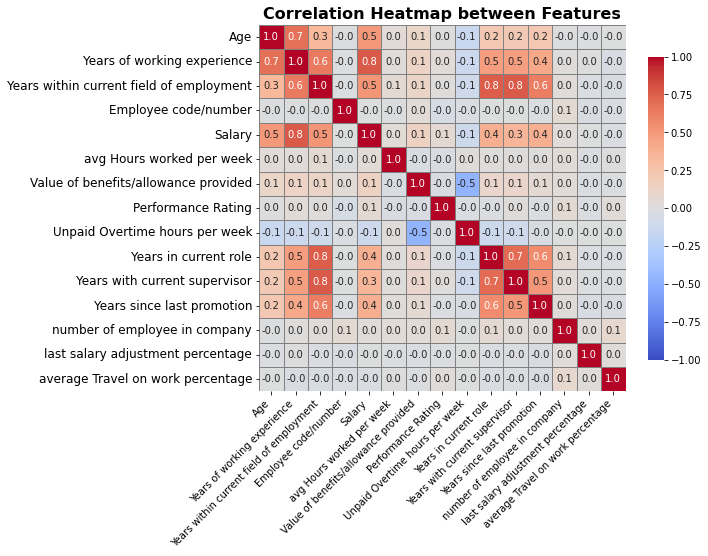

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_reordered.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.1f', 
    cmap='coolwarm',  
    vmin=-1, vmax=1, 
    linewidths=0.5,     
    linecolor='gray',   
    cbar_kws={"shrink": 0.8}, 
    square=True         
)

# Improve title and axis label sizes
plt.title('Correlation Heatmap between Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(rotation=0, fontsize=12)          

# Display the heatmap
plt.tight_layout() 
plt.show()